## **End to end Multi-class Dog Breed Classification**

This notebook builds an end-to-end multi-class image classifier using Tensorflow.

### 1. Problem 

Identifying the breed of any dog from an image
### 2. Data

Data is being used from the Kaggle Dog Breed Identification competition : https://www.kaggle.com/c/dog-breed-identification/data
### 3. Evaluation

The evaluation is a file with predicted probabilities for each dog breed of each test image
### 4. Features

* We are dealing with unstructured data
* There are 120 different dog breeds 
* There are 10,000+ images in test and training set.


In [3]:
import tensorflow as tf


2025-01-14 02:30:29.724547: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-14 02:30:29.844354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736802029.891459    5327 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736802029.904411    5327 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 02:30:30.021894: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.18.0


In [5]:
print("GPU: " , "available" if tf.config.list_physical_devices("GPU") else "No")

GPU:  available


In [6]:
import tensorflow_hub as tub

**Turning all of our data into tensors (numerical representation for unstructured data)**

In [7]:
import pandas as pd

In [8]:
labels_csv =pd.read_csv('/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: xlabel='breed'>

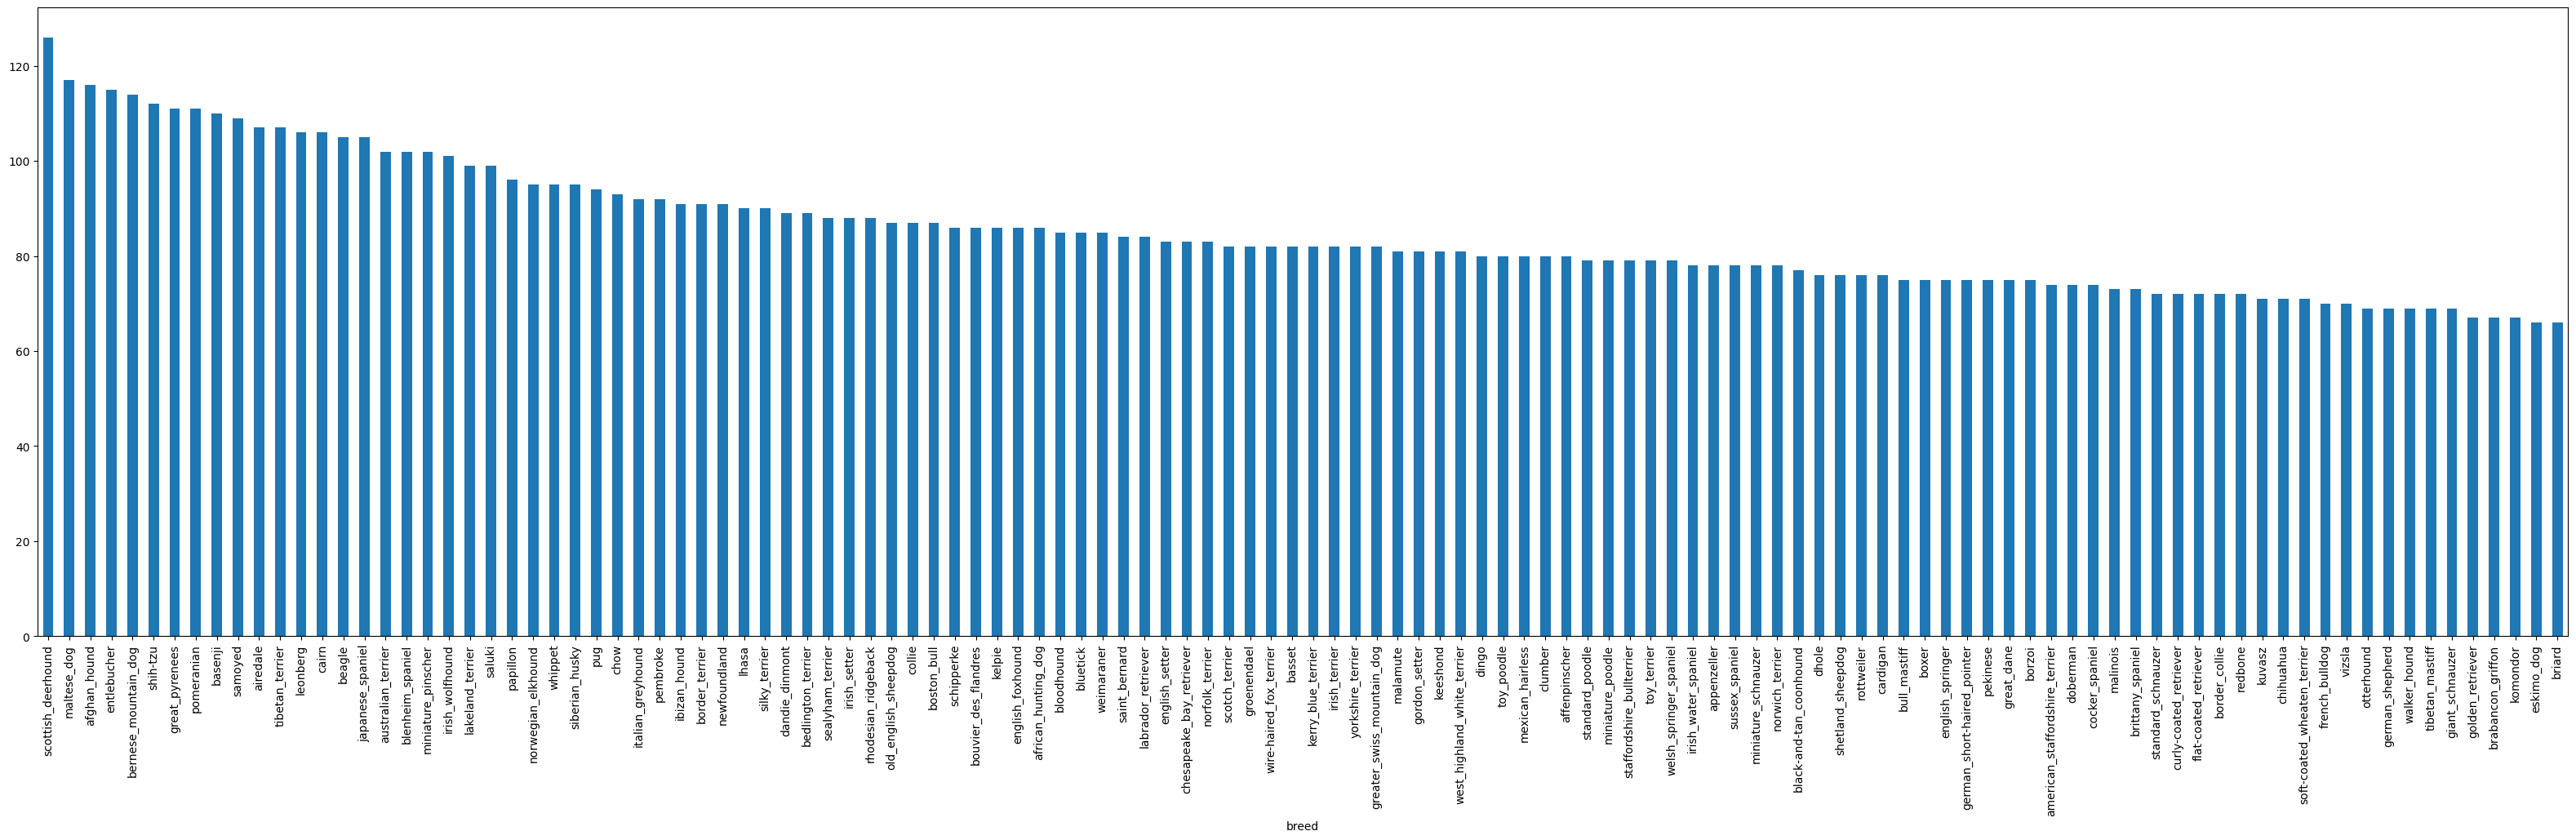

In [10]:
labels_csv['breed'].value_counts().plot.bar(figsize = (40,10))

In [11]:
labels_csv['breed'].value_counts().median()

82.0

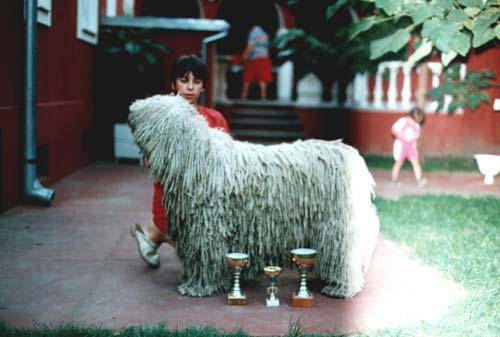

In [12]:
from IPython.display import Image
Image("/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/0a001d75def0b4352ebde8d07c0850ae.jpg")


#### **Getting a list of all image file pathnames**

In [13]:
filenames = ["/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv['id']]
filenames[:10]

['/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-br

In [14]:
import os
if len(os.listdir("/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/")) == len(filenames):
    print("Matching")
else:
    print("There is a mistake")

Matching


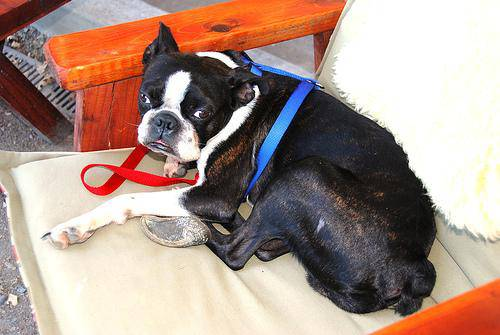

In [15]:
Image(filenames[4040])

In [16]:
labels_csv.iloc[4040]

id       6487f0f5886fa4e46ef422d8069acb8d
breed                                 pug
Name: 4040, dtype: object

#### **Let's prepare our labels**

In [17]:
import numpy as np

In [19]:
labels = labels_csv['breed'].to_numpy()

In [20]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [21]:
if len(labels) == len(filenames) :  
    print("No issues")
else:
    print("Number of labels does not match number of file names")

No issues


In [22]:
unique_breeds = np.unique(labels)

In [25]:
len(unique_breeds)

120

#### **Turn every label into a boolean array**

In [29]:
print(labels[0])
labels[0] == unique_breeds   #Returns a boolean array where only the location where the given label is present is as True and every other one is as false.

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [30]:
boolean_labels = [label == unique_breeds for label in labels]

In [34]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [32]:
len(boolean_labels)

10222

In [36]:
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))


19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
